[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vpw/EIP2/blob/master/DNN-submit.ipynb)

# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D, SeparableConv2D
from keras.layers import Conv2DTranspose, AveragePooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
(10000, 28, 28)


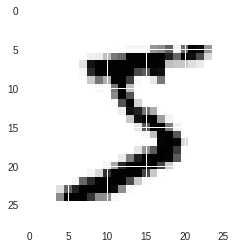

In [39]:
print (X_train.shape)
print (X_test.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [42]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [44]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
from keras.layers import Activation, LeakyReLU
model = Sequential()

# original submitted modified

model.add(Conv2D(16, kernel_size=(9, 9), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
#16, 20
model.add(SeparableConv2D(32, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
#32, 18
model.add(SeparableConv2D(64, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
#64, 16
model.add(Conv2D(32, 1, activation='relu'))
model.add(BatchNormalization(axis=-1))
#32, 16
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#32, 8
model.add(SeparableConv2D(64, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
#64, 6
model.add(Conv2D(32, 1, activation='relu'))
model.add(BatchNormalization(axis=-1))
#32, 6
model.add(SeparableConv2D(32, 3, activation='relu'))
model.add(BatchNormalization(axis=-1))
#32, 4
model.add(Flatten())
#1, 32*16
model.add(Dense(10, activation='softmax'))


"\n\n# 2nd try\nmodel.add(Conv2D(16, kernel_size=(11, 11), activation='relu', input_shape=(28,28,1)))\n#model.add(Conv2D(32, kernel_size=(11, 11), input_shape=(28,28,1)))\n#model.add(LeakyReLU(alpha=0.1))\n#model.add(BatchNormalization(axis=-1))\n#16, 18\n#model.add(SeparableConv2D(64, 3, activation='relu'))\nmodel.add(SeparableConv2D(32, 3))\nmodel.add(LeakyReLU(alpha=0.1))\nmodel.add(BatchNormalization(axis=-1))\nmodel.add(Dropout(0.25))\n#32, 16\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n#32, 8\nmodel.add(Conv2D(64, 1))\n#model.add(LeakyReLU(alpha=0.1))\nmodel.add(BatchNormalization(axis=-1))\n#64, 8\n#model.add(Dropout(0.25))\n#model.add(SeparableConv2D(64, 3, activation='relu'))\nmodel.add(Conv2D(16, 3))\nmodel.add(LeakyReLU(alpha=0.1))\nmodel.add(BatchNormalization(axis=-1))\n#16, 6\nmodel.add(Flatten())\n#16*16\nmodel.add(Dense(10, activation='softmax'))\n"

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 20, 20, 16)        1312      
_________________________________________________________________
batch_normalization_39 (Batc (None, 20, 20, 16)        64        
_________________________________________________________________
separable_conv2d_24 (Separab (None, 18, 18, 32)        688       
_________________________________________________________________
batch_normalization_40 (Batc (None, 18, 18, 32)        128       
_________________________________________________________________
separable_conv2d_25 (Separab (None, 16, 16, 64)        2400      
_________________________________________________________________
batch_normalization_41 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 32)        2080      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [52]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

earlyStopping=EarlyStopping(monitor='val_loss', patience=8, verbose=1, mode='max', min_delta=0)
checkp=ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

model.fit(X_train, Y_train, batch_size=512, nb_epoch=100, verbose=1, 
         callbacks=[earlyStopping, checkp], 

model = load_model(filepath='best_model.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 171us/step - loss: 0.0304 - acc: 0.9903 - val_loss: 0.0329 - val_acc: 0.9888
Epoch 2/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.0300 - acc: 0.9903 - val_loss: 0.0287 - val_acc: 0.9906
Epoch 3/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.0276 - acc: 0.9914 - val_loss: 0.0272 - val_acc: 0.9910
Epoch 4/100
60000/60000 [==============================] - 10s 169us/step - loss: 0.0249 - acc: 0.9920 - val_loss: 0.0395 - val_acc: 0.9875
Epoch 5/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.0242 - acc: 0.9924 - val_loss: 0.0331 - val_acc: 0.9897
Epoch 6/100
60000/60000 [==============================] - 10s 169us/step - loss: 0.0215 - acc: 0.9929 - val_loss: 0.0401 - val_acc: 0.9869
Epoch 7/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.0204 - acc: 0.9935 - val_l

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [54]:
print(score)

[0.024794074409222232, 0.9927]


In [0]:
y_pred = model.predict(X_test)
y_predtr = model.predict(X_train)

In [0]:
#print y_pred.shape[0]
#print Y_test[0]
y_predc = [ np.argmax(x) for x in y_pred]
y_predctr = [ np.argmax(x) for x in y_predtr]

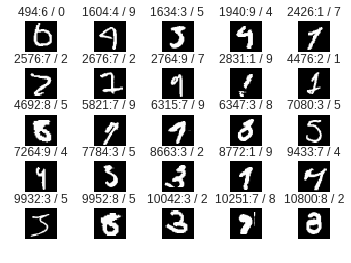

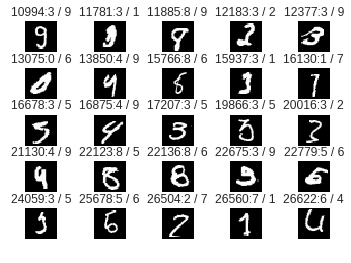

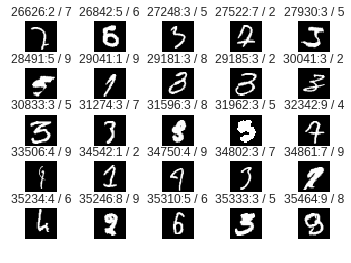

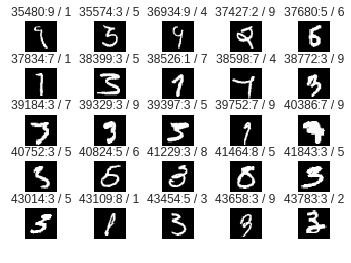

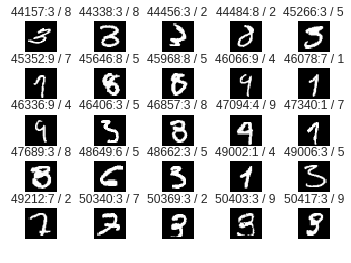

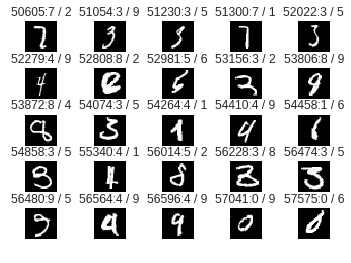

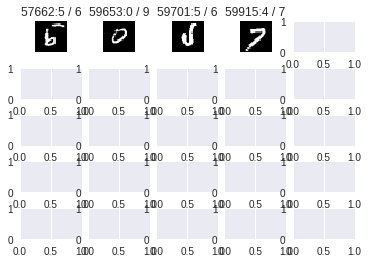

In [57]:
# check the failed trainging images
mm=0
for i in range(y_predtr.shape[0]):
  if y_predctr[i] != y_train[i]:
    #print i, y_predc[i], y_test[i]
    
    mm = mm % 25
    if mm == 0:
      fig, ax = plt.subplots(5,5)
      fig.subplots_adjust(hspace=0.5, wspace=0.1)
    #img=np.array(X_test[i]).reshape((1, 28, 28, 1)).astype(np.float64)
    img=np.array(X_train[i]).reshape((1, 28, 28, 1)).astype(np.float64)
    r,c = int(mm/5), mm%5
    #print r,c
    ax[r,c].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[r,c].axis('off')
    ax[r,c].set_title('%d:%d / %d' % (i,y_train[i], y_predctr[i]))
    mm = mm + 1
  

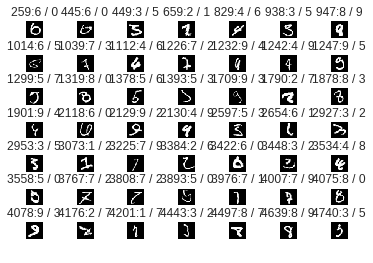

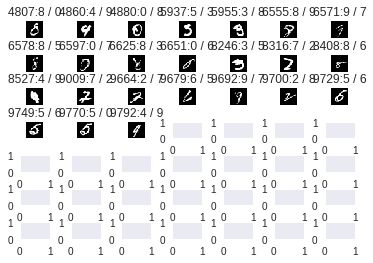

In [63]:
#check the failed test images 
mm=0
sd=7
for i in range(y_pred.shape[0]):
  if y_predc[i] != y_test[i]:
    #print i, y_predc[i], y_test[i]
    
    mm = mm % (sd*sd)
    if mm == 0:
      fig, ax = plt.subplots(sd,sd)
      fig.subplots_adjust(hspace=1, wspace=0.7)
    img=np.array(X_test[i]).reshape((1, 28, 28, 1)).astype(np.float64)
    r,c = int(mm/sd), mm%sd
    #print r,c
    ax[r,c].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[r,c].axis('off')
    ax[r,c].set_title('%d:%d / %d' % (i,y_test[i], y_predc[i]))
    mm = mm + 1

In [64]:
print(y_pred[:9])
print(y_test[:9])

[[8.04815676e-12 3.45471385e-09 2.66546452e-09 3.23751426e-09
  8.54674729e-13 2.67089972e-09 5.91735591e-14 1.00000000e+00
  1.48971092e-12 4.44936005e-10]
 [1.80915578e-07 4.85658575e-07 9.99998927e-01 4.08627687e-10
  1.62463602e-11 7.66987775e-12 3.78682813e-07 2.17107471e-10
  3.49187290e-10 9.09731838e-12]
 [3.17998889e-08 9.99960423e-01 2.90556045e-07 2.84933304e-08
  6.87354759e-06 1.12193177e-07 1.30597130e-06 3.00389438e-05
  6.93601464e-07 1.98600205e-07]
 [9.99674678e-01 5.91012306e-09 1.15721277e-05 5.72634340e-09
  2.06014602e-06 3.46853744e-06 2.62717134e-04 4.56965736e-08
  4.57946726e-07 4.50804364e-05]
 [1.39365908e-09 1.10670875e-07 4.42253678e-10 5.08200686e-13
  9.99988079e-01 3.42398657e-12 5.70037573e-10 4.55322358e-09
  4.40770901e-13 1.18571743e-05]
 [1.07801315e-08 9.99859810e-01 5.53831185e-08 2.84913355e-08
  6.91482683e-06 1.74195861e-07 3.89934144e-07 1.31324588e-04
  1.39605149e-07 1.00854288e-06]
 [1.50225353e-11 7.29140615e-09 2.36163367e-10 2.46436274e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

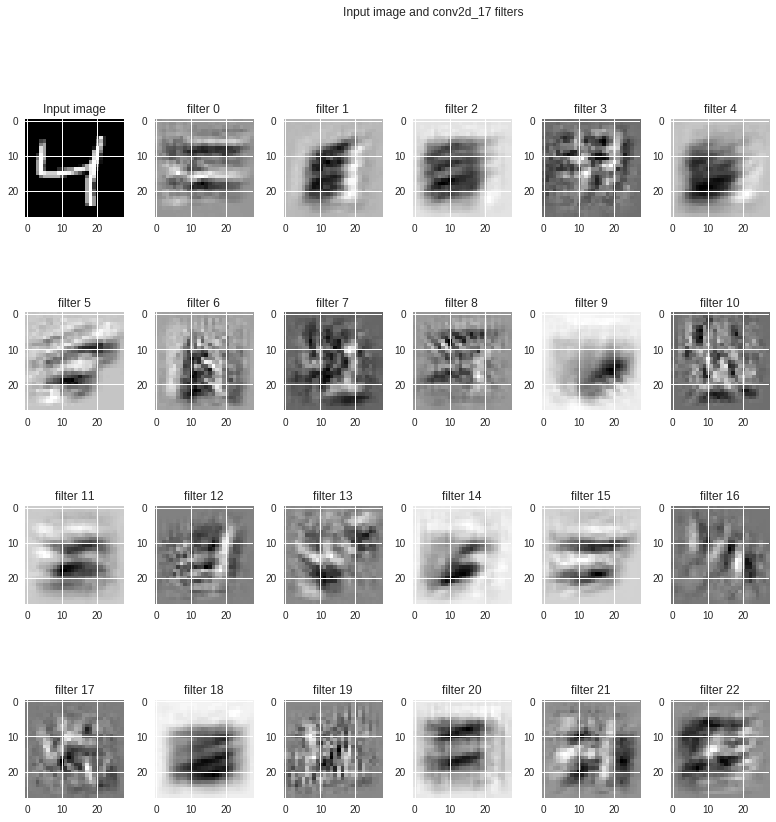

In [66]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name='conv2d_17')